In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df2 = df.set_index('Month')

In [5]:
df2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df2.columns = ['passengers']

In [8]:
df2.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'Plot')

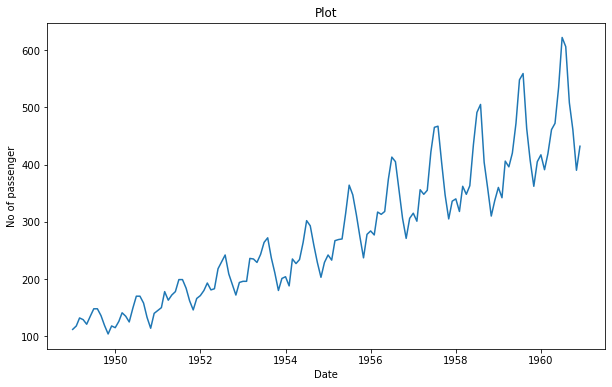

In [9]:
# plot 
plt.plot(df2)
plt.xlabel("Date")
plt.ylabel("No of passenger")
plt.title("Plot")

### here the data is not stationary as average is not contant all the time

In [10]:
# test for stationarity by means of rolling average
rollmean = df2.rolling(window=12).mean()

rollstd =  df2.rolling(window=12).std()
print(rollmean,rollstd)

            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean and std')

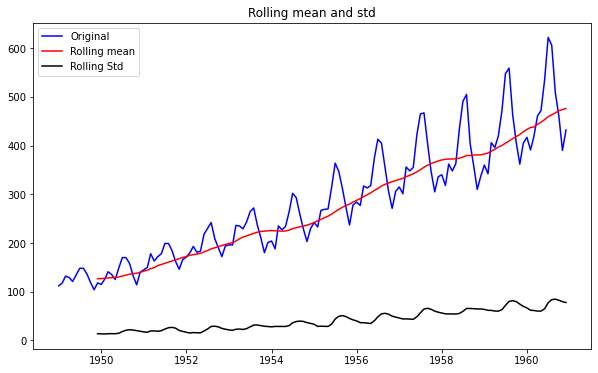

In [11]:
# ploting the rolling mean
org = plt.plot(df2, color='b', label='Original')
mean = plt.plot(rollmean, color='r', label='Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling mean and std"
         )

In [12]:
# Performing Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

print("Result of dickey fuller test :")
dftest = adfuller(df2['passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statstics', 'p-value', 'Flags Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

Result of dickey fuller test :
Test Statstics                  0.815369
p-value                         0.991880
Flags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


#### p-value is greater than 0.05 so series is not stationary 

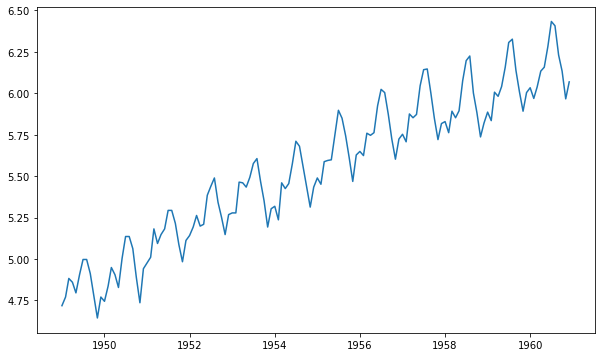

In [13]:
#Estimating trend
df_logScale = np.log(df2)
plt.plot(df_logScale)

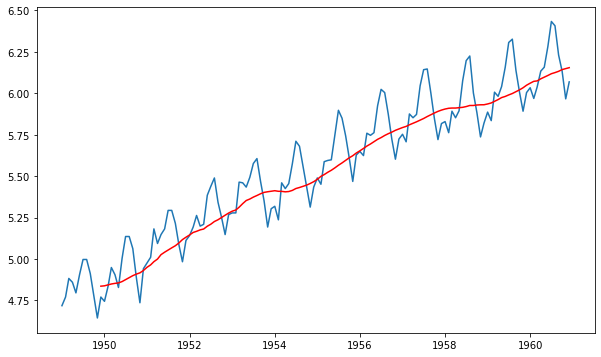

In [14]:
movingavg = df_logScale.rolling(window=12).mean()

movingSTD =  df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingavg, color='r')

In [15]:
# Transforming 
dftrans = df_logScale-movingavg
dftrans.head(12)

dftrans.dropna(inplace=True)
dftrans.head(10)

,passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [16]:
def test_for_stationary(timeseries):
    #determining rolling statistics
    movingavg = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    # Ploting rolling statistic
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(movingavg, color='r', label='Rolling mean')
    std = plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and std")
    
    #Performong Dickey Fuller test
    print("Result of dickey fuller test :")
    dftest = adfuller(timeseries['passengers'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statstics', 'p-value', 'Flags Used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    
    print(dfoutput)

Result of dickey fuller test :
Test Statstics                 -3.162908
p-value                         0.022235
Flags Used                     13.000000
Number of Observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


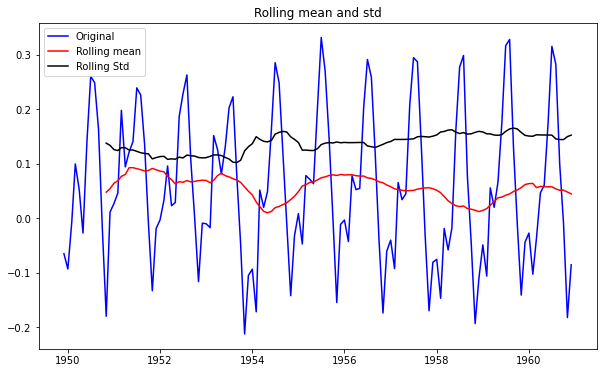

In [17]:
test_for_stationary(dftrans)

#### here result are quite good p value is 0.02 which less than standard also you can see there is no trend mean and std are near to constant

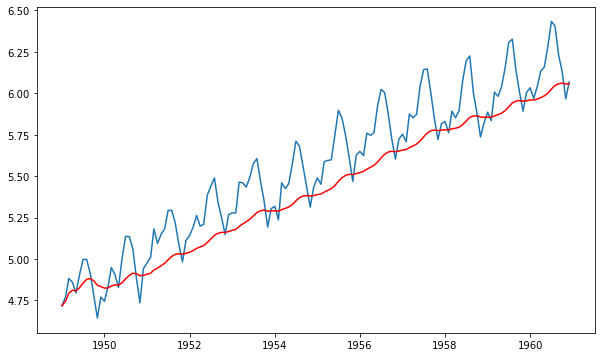

In [18]:
# Another method by weighted average
exponentialDecayWeightedAvg = df_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAvg, color='r')

Result of dickey fuller test :
Test Statstics                 -3.601262
p-value                         0.005737
Flags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


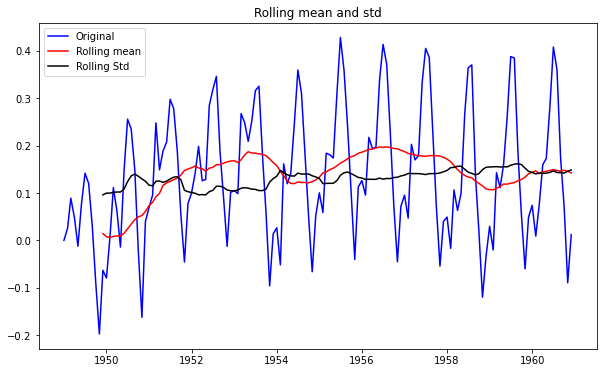

In [19]:
# Again subtracting this mean from logscale
dftrans2  =df_logScale-exponentialDecayWeightedAvg
test_for_stationary(dftrans2)

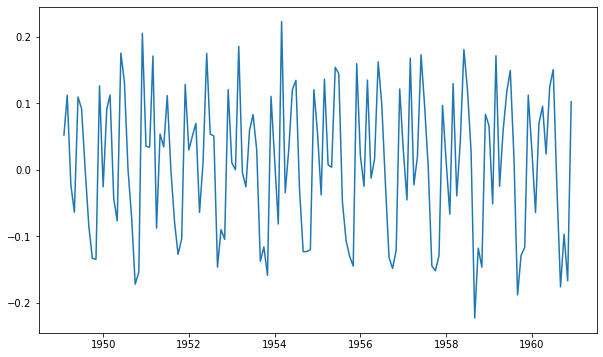

In [20]:
# Shifting the value
dftranshift = df_logScale-df_logScale.shift()
plt.plot(dftranshift)

Result of dickey fuller test :
Test Statstics                 -2.717131
p-value                         0.071121
Flags Used                     14.000000
Number of Observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


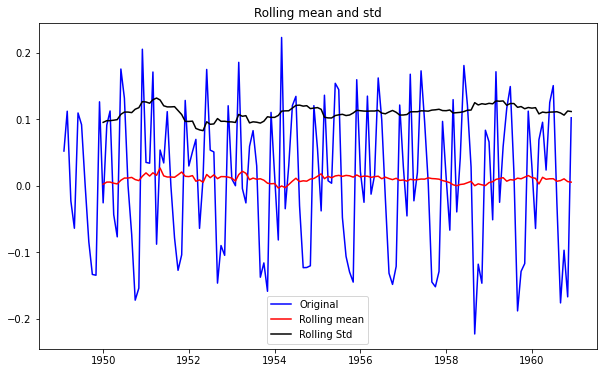

In [21]:
dftranshift.dropna(inplace=True)
test_for_stationary(dftranshift)

In [22]:
df_logScale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


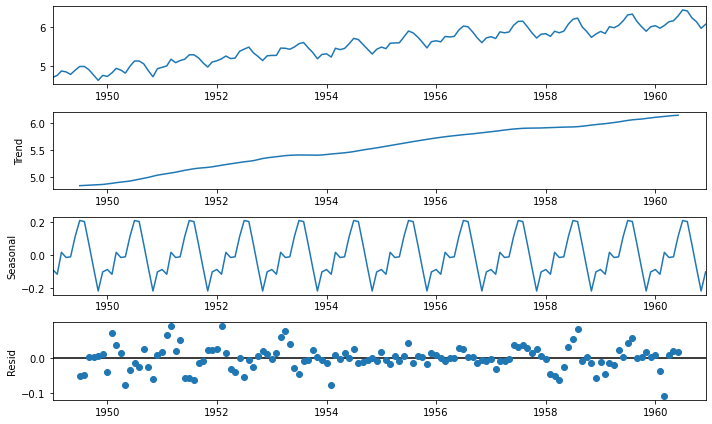

In [23]:
# Decomposing into components
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_logScale, model='additive')
decompose.plot()
plt.show()



C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


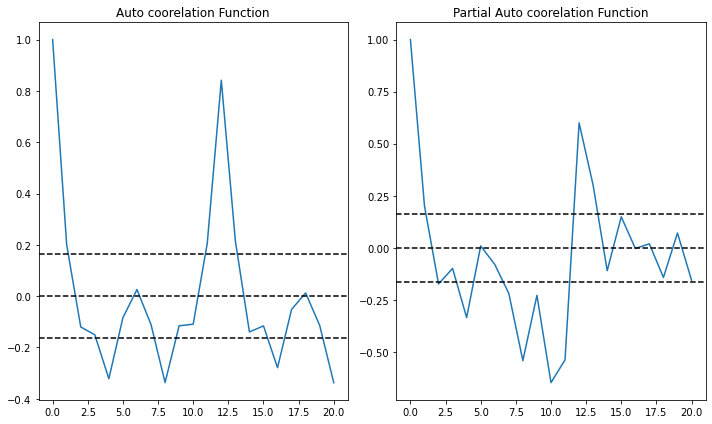

In [24]:
# Calculating ACF(p) and pacf(q)
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dftranshift, nlags=20)
lag_pacf = pacf(dftranshift, nlags=20, method='ols')


# Plot ACF:
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(dftranshift)), linestyle='--', color='black' )
plt.axhline(y = 1.96/np.sqrt(len(dftranshift)), linestyle='--', color='black' )
plt.title('Auto coorelation Function')

# Plot PACF:
plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(dftranshift)), linestyle='--', color='black' )
plt.axhline(y = 1.96/np.sqrt(len(dftranshift)), linestyle='--', color='black' )
plt.title('Partial Auto coorelation Function')
plt.tight_layout()

In [25]:
## here we can see p = 2, q=2

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so in

Plotting of AR


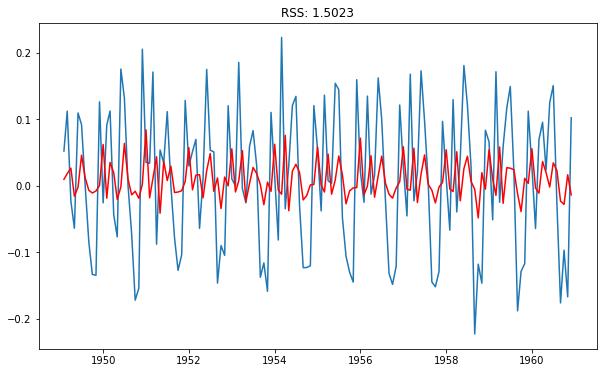

In [26]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(df_logScale, order =(2,1,0))
result_AR = model.fit(disp = -1)
plt.plot(dftranshift)
plt.plot(result_AR.fittedvalues, color='r')
plt.title('RSS: %0.4f'% sum((result_AR.fittedvalues-dftranshift['passengers'])**2))
print('Plotting of AR')

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting of AR


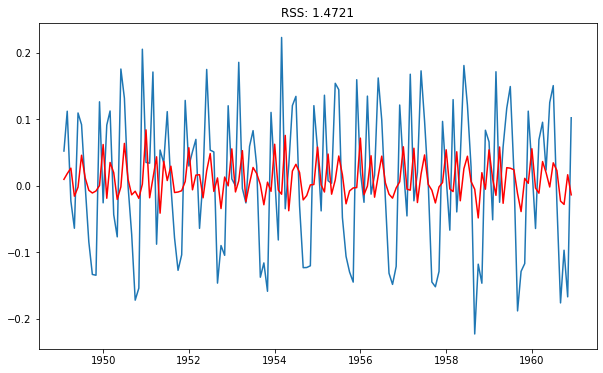

In [27]:
# MA model
model = ARIMA(df_logScale, order =(0,1,2))
result_MA = model.fit(disp = -1)
plt.plot(dftranshift)
plt.plot(result_AR.fittedvalues, color='r')
plt.title('RSS: %0.4f'% sum((result_MA.fittedvalues-dftranshift['passengers'])**2))
print('Plotting of AR')

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting of AR


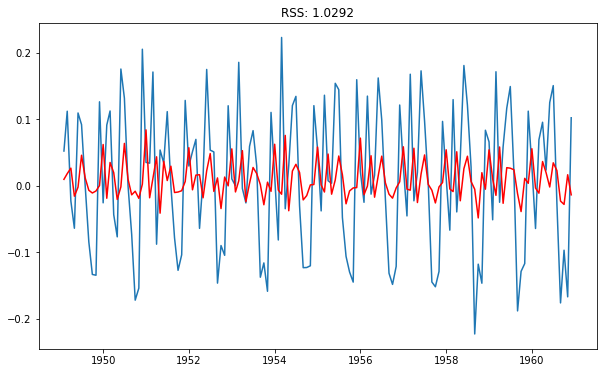

In [28]:
# ARIMA model
model = ARIMA(df_logScale, order =(2,1,2))
result_ARIMA = model.fit(disp = -1)
plt.plot(dftranshift)
plt.plot(result_AR.fittedvalues, color='r')
plt.title('RSS: %0.4f'% sum((result_ARIMA.fittedvalues-dftranshift['passengers'])**2))
print('Plotting of AR')

#### here the value reduced of rss which is good

In [29]:
prediction_ARIMA = pd.Series(result_ARIMA.fittedvalues, copy=True)
print(prediction_ARIMA)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [30]:
# Convert to cummulative sum
prediction_ARIMA_csum = prediction_ARIMA.cumsum()
prediction_ARIMA_csum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [31]:
prediction_ARIMA_log = pd.Series(df_logScale['passengers'].iloc[0], index=df_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_csum, fill_value=0)
prediction_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

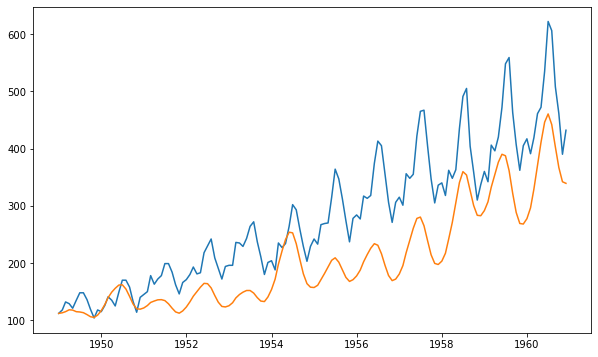

In [32]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df2)
plt.plot(prediction_ARIMA)

In [33]:
df_logScale

,passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


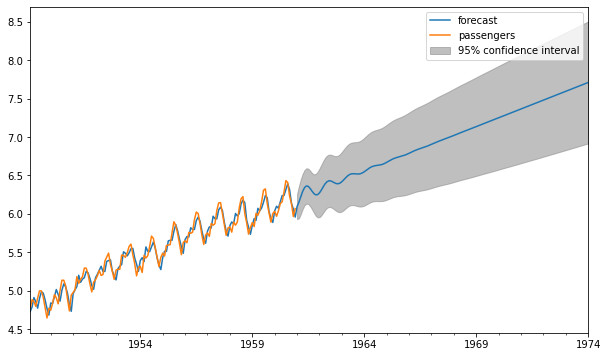

In [34]:
# prediction 
result_ARIMA.plot_predict(1,300)
plt.show()

In [35]:
x =result_ARIMA.forecast(steps=120)

In [36]:
x[1]  # prediction of each month for next months for 10 years

array([0.08384711, 0.10749462, 0.11568695, 0.11702776, 0.11703498,
       0.11744018, 0.1176225 , 0.11778714, 0.12024163, 0.12736042,
       0.13870959, 0.15118792, 0.16157813, 0.16834395, 0.1717733 ,
       0.17311983, 0.17358733, 0.1738546 , 0.17430218, 0.17543333,
       0.17788148, 0.18195723, 0.18726218, 0.19283394, 0.19769246,
       0.20130641, 0.20369057, 0.20519835, 0.20625271, 0.20721001,
       0.20836974, 0.21000329, 0.21229747, 0.21524481, 0.21860182,
       0.22198259, 0.22503067, 0.22755298, 0.2295481 , 0.23114802,
       0.23253829, 0.23390538, 0.23541314, 0.23718316, 0.23926542,
       0.24161542, 0.24410375, 0.24656361, 0.2488526 , 0.25089634,
       0.25269738, 0.25431633, 0.25584317, 0.25737233, 0.25898395,
       0.26072855, 0.26261553, 0.26461094, 0.26664903, 0.26865486,
       0.27056854, 0.27236102, 0.27403707, 0.2756278 , 0.27717835,
       0.27873532, 0.28033597, 0.28200024, 0.28372688, 0.28549516,
       0.28727217, 0.28902351, 0.29072343, 0.29236089, 0.29394

In [37]:
len(x[1])

120

In [38]:
np.exp(x[0])

array([ 443.87098337,  470.03824071,  504.9349853 ,  540.45480899,
        567.73069   ,  580.32809508,  577.00266039,  561.93887531,
        542.38466264,  525.56675039,  516.65912297,  518.14325664,
        529.93713117,  549.71673143,  573.36063887,  595.78896791,
        612.33149572,  620.24251144,  619.59555355,  613.03679303,
        604.59670471,  598.26645927,  596.94852985,  601.96245481,
        612.98283826,  628.25998635,  645.08000048,  660.46217145,
        671.98847925,  678.50399331,  680.39658549,  679.34149974,
        677.65977205,  677.58633453,  680.69837525,  687.61126266,
        697.93692037,  710.462092  ,  723.50184834,  735.36385444,
        744.81263874,  751.39227998,  755.49861726,  758.187991  ,
        760.81252289,  764.62072572,  770.4425704 ,  778.52294774,
        788.51647226,  799.62474877,  810.83639739,  821.21015849,
        830.12589833,  837.4318626 ,  843.4479405 ,  848.83419015,
        854.37765377,  860.76885672,  868.42992618,  877.43098

In [39]:
df2.tail()

,passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## SES DES TES

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [41]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [42]:
df = df.set_index(['Month'])

In [43]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

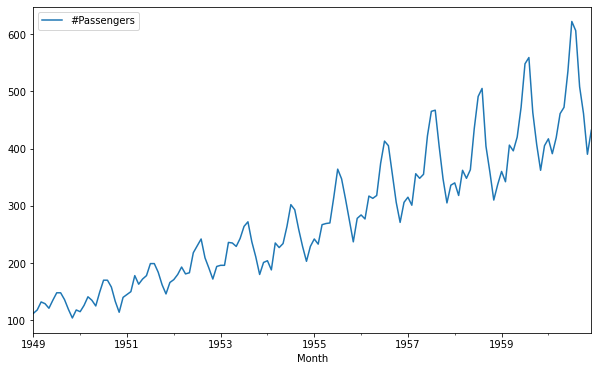

In [44]:
df.plot()

In [46]:
decompose_results = seasonal_decompose(df, model='multiplicative')

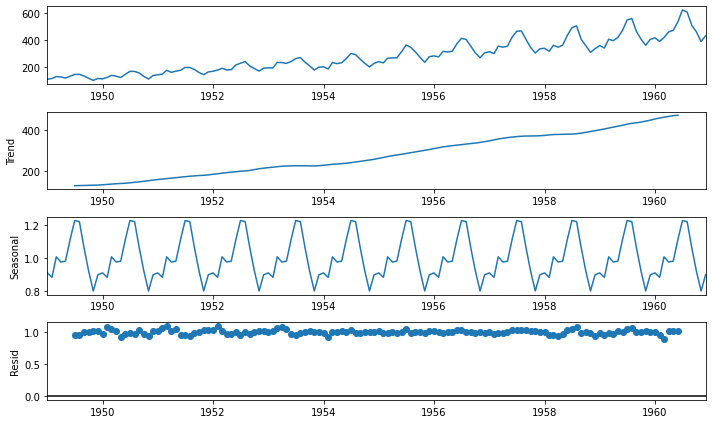

In [48]:
decompose_results.plot();

In [49]:
# Data preparing
# Seting the frequnecy as monthly
df.index.freq = 'MS'

In [61]:
# Setting the value of alpha and defining the time period
m = 12
alpha = 1/(2*m)

In [63]:
# SES
sse =SimpleExpSmoothing(df['#Passengers'])

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [64]:
df['HWES1'] = sse.fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues

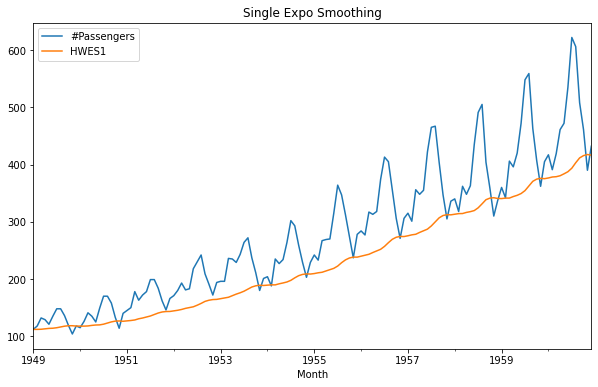

In [65]:
df[['#Passengers', 'HWES1']].plot(title='Single Expo Smoothing');

In [62]:
alpha

0.041666666666666664

In [67]:
# DES

df['HWES2_add'] = ExponentialSmoothing(df['#Passengers'], trend='add').fit().fittedvalues

df['HWES2_mil'] = ExponentialSmoothing(df['#Passengers'], trend='mul').fit().fittedvalues

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


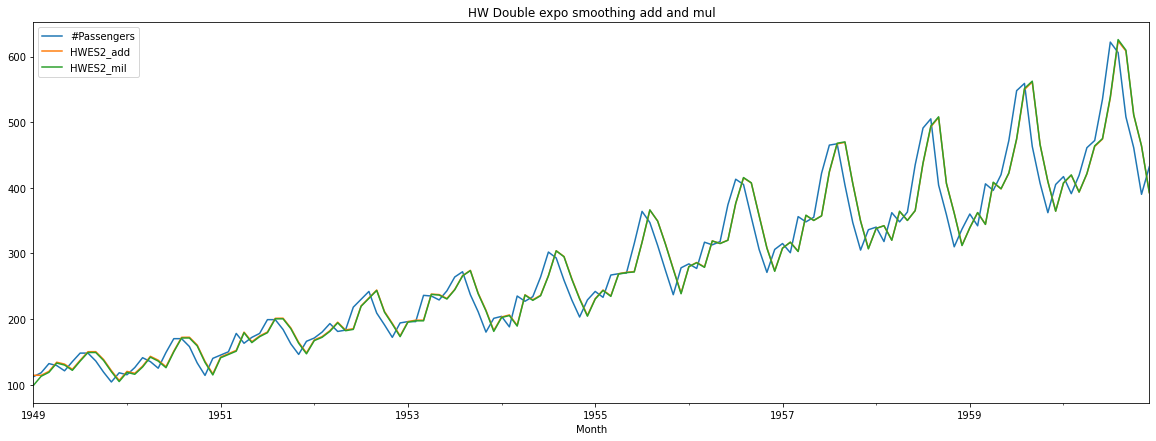

In [71]:
df[['#Passengers', 'HWES2_add','HWES2_mil']].plot(title='HW Double expo smoothing add and mul', figsize=(20,7));

In [73]:
# TES

df['HWES3_add'] = ExponentialSmoothing(df['#Passengers'], trend='add',seasonal='add',
                                      seasonal_periods=12).fit().fittedvalues

df['HWES3_mul'] = ExponentialSmoothing(df['#Passengers'], trend='mul', seasonal='mul',
                                      seasonal_periods=12).fit().fittedvalues

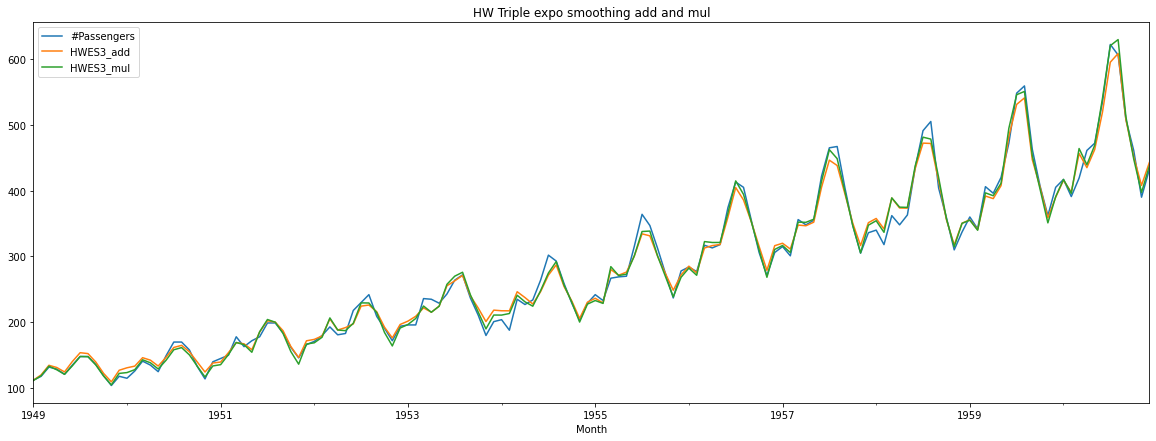

In [74]:
df[['#Passengers', 'HWES3_add','HWES3_mul']].plot(title='HW Triple expo smoothing add and mul', figsize=(20,7));

## Forecasting using Triple Exponential Smoothing


In [75]:
df.shape

(144, 6)

In [76]:
train_set = df[:120]
test_set = df[120:]

In [78]:
fitted_model = ExponentialSmoothing(train_set['#Passengers'], trend = 'mul'
                                    , seasonal='mul',seasonal_periods=12).fit()

In [80]:
test_prediction = fitted_model.forecast(24)

Text(0.5, 1.0, 'Train, Test, Prediction')

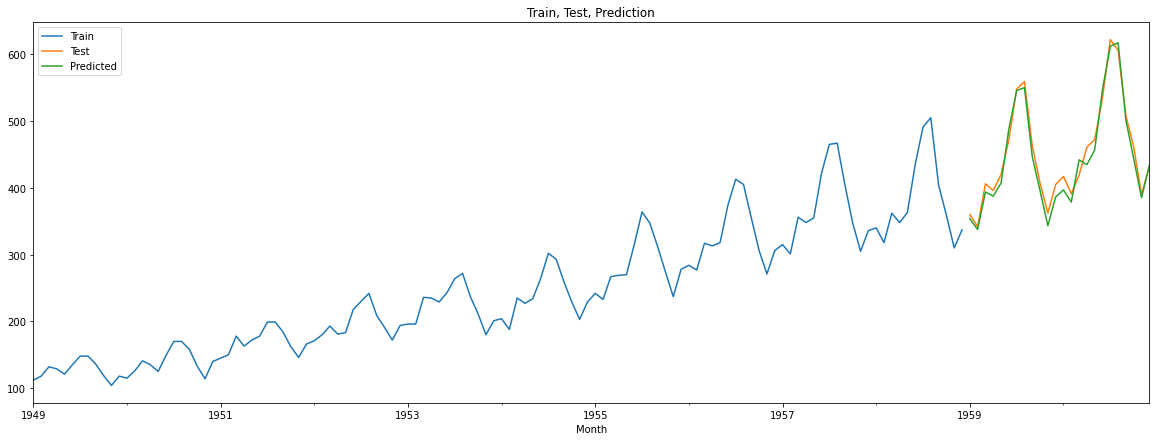

In [85]:
train_set['#Passengers'].plot(label='Train', legend=True, figsize = (20,7))
test_set['#Passengers'].plot(label='Test', legend=True)
test_prediction.plot(label='Predicted', legend=True)
plt.title('Train, Test, Prediction')